In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read_multi_folder(folder, nodes, enable_pgo=True):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, [i], t0=t0)
        if enable_pgo:
            _paths_pgo, t0 = read_paths(output_folder, [i], prefix="pgo_", t0=t0)
            paths_pgo[i] = _paths_pgo[i]
        paths[i] = _paths[i]
    if len(paths_pgo) == 0:
        return paths, None, t0
    return paths, paths_pgo, t0


In [11]:
nodes = [1, 2, 5, 6, 7]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_noyaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte))

# paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_noyaw_", t0=t0)
# print("VINS-Mono")
# align_paths(paths_vo, paths_gt)
# display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
# display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))

# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,209.2m,0.115,0.853,1.3e-03,1.3e-03,2.1e-04,6.43e-04
2,215.8m,0.130,0.746,3.3e-03,1.1e-03,4.3e-04,1.77e-03
5,214.1m,0.118,1.061,1.2e-03,8.6e-04,1.4e-04,6.27e-04
6,215.2m,0.123,0.581,1.3e-03,9.2e-04,1.2e-04,1.54e-03
7,214.2m,0.125,0.884,7.6e-04,9.5e-04,1.2e-04,2.23e-03
Avg.,213.7,0.122,0.83,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.026,0.032,0.022",0.046,0.48°,"-0.001,+0.023,+0.003",+0.21°
5->1,"0.018,0.018,0.009",0.027,0.29°,"-0.012,-0.008,+0.000",+0.04°
5->2,"0.031,0.039,0.023",0.055,0.38°,"-0.010,-0.031,-0.002",-0.16°
6->1,"0.019,0.023,0.011",0.032,0.87°,"0.007,+0.017,-0.001",+0.69°
6->2,"0.024,0.019,0.026",0.040,0.63°,"0.005,-0.004,-0.004",+0.49°
6->5,"0.027,0.027,0.012",0.040,0.80°,"0.019,+0.022,-0.002",+0.65°
7->1,"0.024,0.032,0.012",0.042,0.36°,"0.002,-0.006,+0.002",+0.15°
7->2,"0.032,0.046,0.023",0.060,0.39°,"0.004,-0.029,-0.001",-0.05°
7->5,"0.028,0.030,0.012",0.043,0.30°,"0.014,+0.002,+0.001",+0.10°
7->6,"0.025,0.039,0.010",0.048,0.74°,"-0.002,-0.025,+0.003",-0.54°


In [4]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-async/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_yaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))

# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))




Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,238.2m,2.793,18.687,3.7e-03,5.7e-03,2.2e-04,1.30e-02
2,237.8m,2.778,17.980,3.8e-03,6.1e-03,2.2e-04,2.64e-03
3,238.3m,2.792,18.724,3.2e-03,6.7e-03,2.4e-04,3.28e-03
4,238.5m,2.689,18.242,2.1e-03,7.2e-03,2.3e-04,4.05e-03
5,240.5m,2.707,17.956,3.1e-03,5.2e-03,2.1e-04,2.60e-03
Avg.,238.7,2.752,18.32,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.022,0.013,0.008",0.027,0.98°,"0.015,-0.001,-0.001",+0.21°
3->1,"0.024,0.015,0.009",0.030,1.02°,"0.012,-0.004,-0.000",-0.04°
3->2,"0.022,0.018,0.006",0.029,0.63°,"-0.003,-0.004,+0.001",-0.25°
4->1,"0.025,0.018,0.009",0.032,0.90°,"0.010,-0.003,-0.002",+0.03°
4->2,"0.023,0.021,0.006",0.032,0.59°,"-0.005,-0.003,-0.001",-0.17°
4->3,"0.014,0.013,0.007",0.020,0.62°,"-0.002,+0.001,-0.002",+0.08°
5->1,"0.024,0.015,0.008",0.029,0.88°,"0.010,-0.001,-0.001",+0.11°
5->2,"0.024,0.015,0.005",0.029,0.49°,"-0.004,-0.000,+0.000",-0.10°
5->3,"0.012,0.012,0.006",0.019,0.60°,"-0.001,+0.004,-0.000",+0.16°
5->4,"0.019,0.018,0.007",0.027,0.47°,"0.001,+0.003,+0.001",+0.07°


VINS-Mono


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,87.0m,4.189,17.095,1.3e-01,2.2e-01,1.7e-02,8.66e-02
2,175.9m,5.635,9.803,7.5e-02,2.9e-02,1.2e-04,4.02e-02
3,184.6m,4.661,11.581,5.2e-02,1.6e-02,8.1e-05,5.17e-02
4,170.2m,4.248,12.912,1.0e-01,4.7e-02,8.0e-05,4.64e-02
5,196.4m,5.594,11.013,5.1e-02,1.2e-02,7.4e-04,3.61e-02
Avg.,162.8,4.865,12.48,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"1.548,1.588,0.580",2.293,7.05°,"0.157,-0.133,+0.579",+5.52°
3->1,"0.999,1.092,0.585",1.592,5.46°,"0.054,-0.074,+0.583",+3.72°
3->2,"1.034,1.067,0.021",1.486,1.96°,"-0.105,+0.052,+0.005",-1.78°
4->1,"0.770,0.875,0.575",1.299,4.28°,"0.054,-0.036,+0.571",+3.05°
4->2,"1.192,1.205,0.048",1.695,3.03°,"-0.108,+0.089,-0.007",-2.43°
4->3,"0.414,0.409,0.045",0.584,1.51°,"-0.002,+0.039,-0.012",-0.66°
5->1,"1.552,1.593,0.391",2.258,6.12°,"0.145,-0.147,+0.388",+4.89°
5->2,"0.577,0.594,0.191",0.849,1.05°,"-0.018,-0.014,-0.190",-0.61°
5->3,"0.812,0.815,0.196",1.167,1.35°,"0.085,-0.068,-0.195",+1.17°
5->4,"1.012,1.001,0.192",1.436,2.16°,"0.086,-0.107,-0.183",+1.83°


In [7]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,231.6m,2.309,10.984,2.6e-03,8.1e-03,1.6e-04,1.91e-02
2,237.7m,2.342,10.982,4.0e-03,6.9e-03,1.9e-04,2.14e-03
3,237.9m,2.374,11.550,3.2e-03,6.2e-03,1.8e-04,2.85e-03
4,237.9m,2.295,11.134,3.2e-03,6.3e-03,1.9e-04,2.67e-03
5,240.0m,2.289,10.823,3.5e-03,6.6e-03,2.0e-04,2.48e-03
Avg.,237.0,2.322,11.09,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.025,0.013,0.008",0.029,0.95°,"0.018,+0.000,+0.001",+0.08°
3->1,"0.026,0.015,0.008",0.032,0.88°,"0.014,-0.001,+0.001",+0.03°
3->2,"0.023,0.017,0.006",0.029,0.51°,"-0.004,-0.002,-0.000",-0.04°
4->1,"0.028,0.018,0.009",0.034,0.91°,"0.012,-0.000,-0.000",+0.12°
4->2,"0.025,0.020,0.007",0.032,0.51°,"-0.006,-0.001,-0.001",+0.02°
4->3,"0.014,0.013,0.008",0.021,0.49°,"-0.002,+0.001,-0.001",+0.06°
5->1,"0.025,0.016,0.008",0.031,0.87°,"0.013,+0.001,+0.001",+0.15°
5->2,"0.024,0.016,0.005",0.029,0.44°,"-0.005,+0.000,-0.000",+0.08°
5->3,"0.013,0.012,0.005",0.018,0.45°,"-0.001,+0.002,+0.000",+0.12°
5->4,"0.020,0.018,0.007",0.028,0.51°,"0.001,+0.001,+0.001",+0.06°


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1by1,237.5m,1.470,3.601,4.0e-03,6.6e-03,2.5e-04,1.23e-02,0.196,3.990°
2by1,238.9m,1.365,3.646,4.2e-03,6.3e-03,4.9e-04,2.08e-03,0.137,3.053°
Avg.,238.2,1.418,3.62,,,,,0.167,3.52


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.026,0.020,0.026",0.042,1.39°,"-0.017,+0.007,-0.019",+0.59°
Avg:,,0.042,1.39°,,


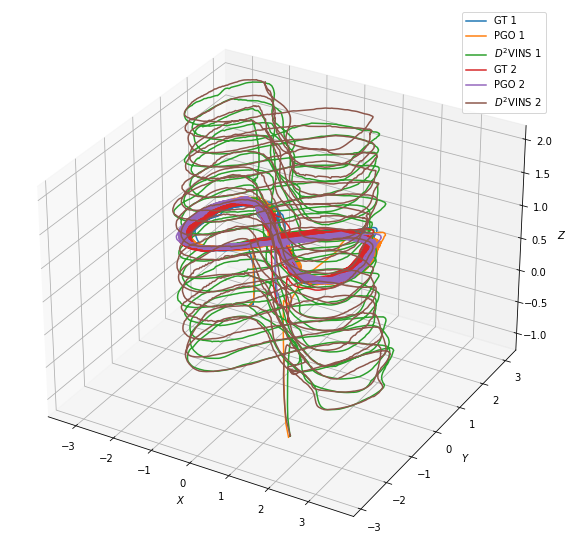

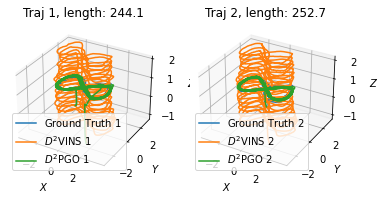

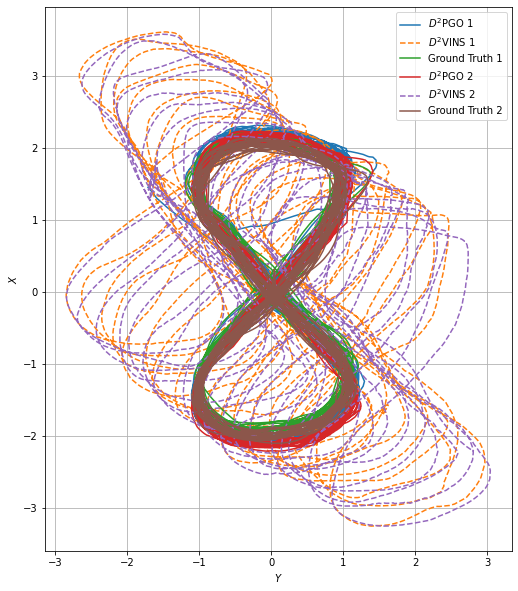

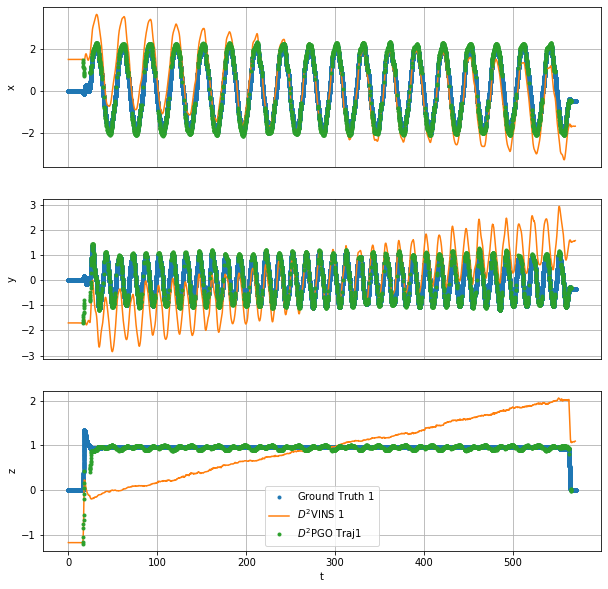

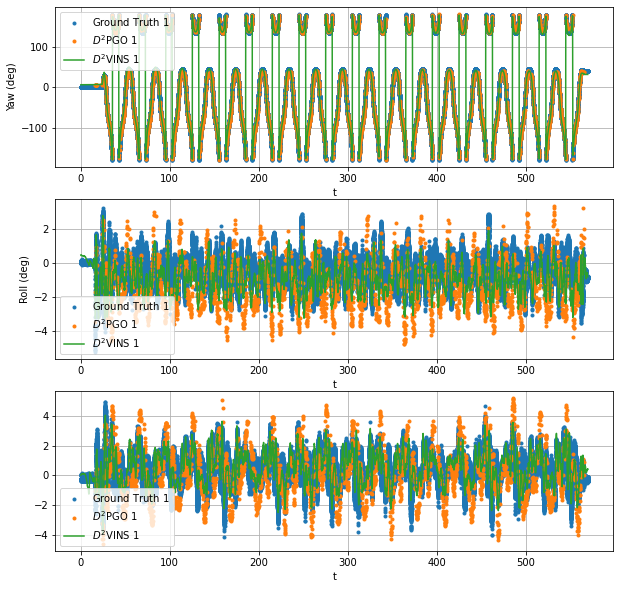

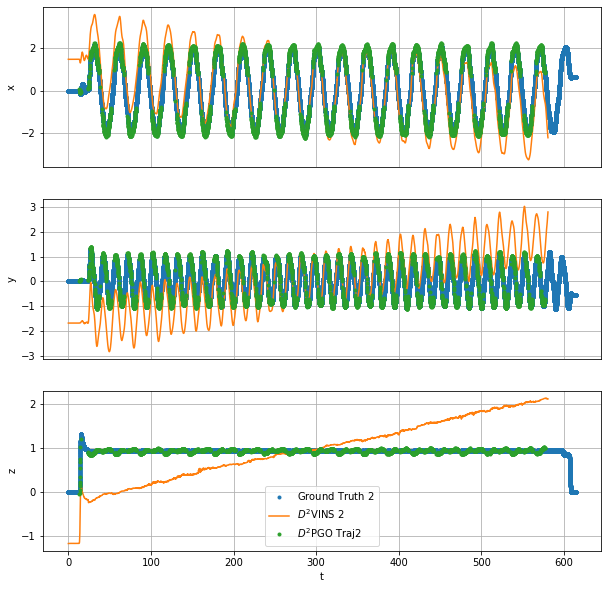

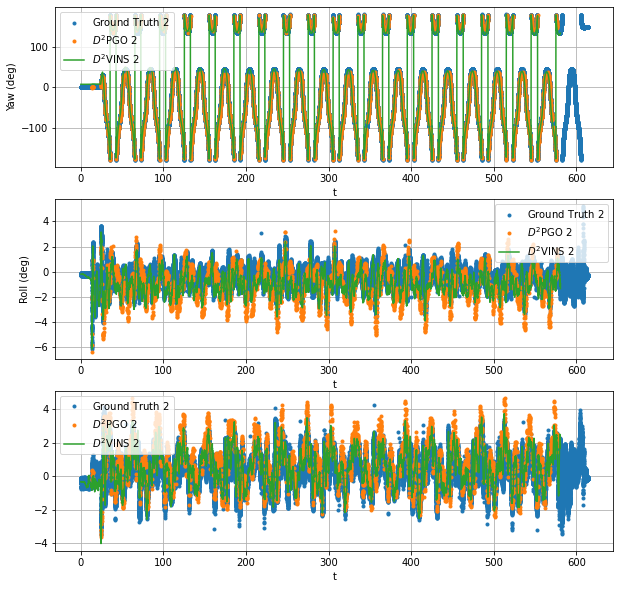

In [7]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-2-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


In [5]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-5-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1,243.3m,2.817,17.437,5.8e-03,7.0e-03,3.1e-04,7.20e-02,0.164,3.173°
2,242.7m,2.770,16.689,4.3e-03,6.8e-03,2.7e-04,2.91e-02,0.165,2.892°
3,242.6m,2.690,17.003,3.9e-03,5.9e-03,2.1e-04,3.45e-02,0.170,3.055°
4,244.0m,2.748,17.427,4.9e-03,7.4e-03,2.2e-04,3.88e-02,0.171,3.118°
5,245.7m,2.797,17.655,4.9e-03,6.2e-03,3.1e-04,3.01e-02,0.169,4.409°
Avg.,243.6,2.764,17.24,,,,,0.168,3.33


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.028,0.021,0.012",0.036,1.27°,"0.016,-0.002,-0.004",+0.47°
3->1,"0.030,0.022,0.011",0.039,1.00°,"0.012,-0.006,-0.002",-0.08°
3->2,"0.028,0.023,0.010",0.037,0.93°,"-0.005,-0.004,+0.003",-0.55°
4->1,"0.031,0.025,0.011",0.041,1.08°,"0.010,-0.006,-0.001",+0.09°
4->2,"0.030,0.027,0.013",0.042,0.80°,"-0.006,-0.005,+0.003",-0.38°
4->3,"0.020,0.020,0.011",0.030,0.78°,"-0.002,-0.000,+0.000",+0.17°
5->1,"0.032,0.024,0.011",0.042,1.01°,"0.011,-0.005,-0.002",-0.10°
5->2,"0.030,0.022,0.009",0.038,0.92°,"-0.005,-0.003,+0.003",-0.57°
5->3,"0.019,0.018,0.009",0.028,0.57°,"-0.000,+0.002,+0.000",-0.02°
5->4,"0.027,0.027,0.012",0.040,0.77°,"0.001,+0.002,-0.000",-0.19°


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 4, 5, 6, 7]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_noyaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 3, 4, 5]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_yaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")
